In [93]:
import os
print(os.getcwd())

C:\Users\jsheu


In [94]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv(r'C:\Users\jsheu\Downloads\Electric_Vehicle_Population_Data.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [95]:
print(df.head())

   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            30.0   
1           Clean Alternative Fuel Vehicle Eligible 

**Beginning of Question 1**: What is the total number of electric vehicles in the dataset, and how is this number distributed across different electric vehicle types (e.g., Battery Electric Vehicle, Plug-in Hybrid Electric Vehicle)?

In [96]:
# Find the total number of vehicles, assuming each line of the dataset is a unique entry
total_vehicles = len(df)
print(len(df))  

210165


In [97]:
# Count unique DOL values
unique_dol_count = df['DOL Vehicle ID'].nunique() 
print(f"Number of unique entries in DOL Vehicle ID: {unique_dol_count}") 

Number of unique entries in DOL Vehicle ID: 210165


In [98]:
# Count unique VIN numbers
unique_vin_count = df['VIN (1-10)'].nunique() 
print(f"Number of unique entries in 'VIN (1-10)': {unique_vin_count}") 

Number of unique entries in 'VIN (1-10)': 12377


In [99]:
# Group by type - BEV vs PHEV
vehicle_type_distribution = df['Electric Vehicle Type'].value_counts() 
print(vehicle_type_distribution)

Electric Vehicle Type
Battery Electric Vehicle (BEV)            165554
Plug-in Hybrid Electric Vehicle (PHEV)     44611
Name: count, dtype: int64


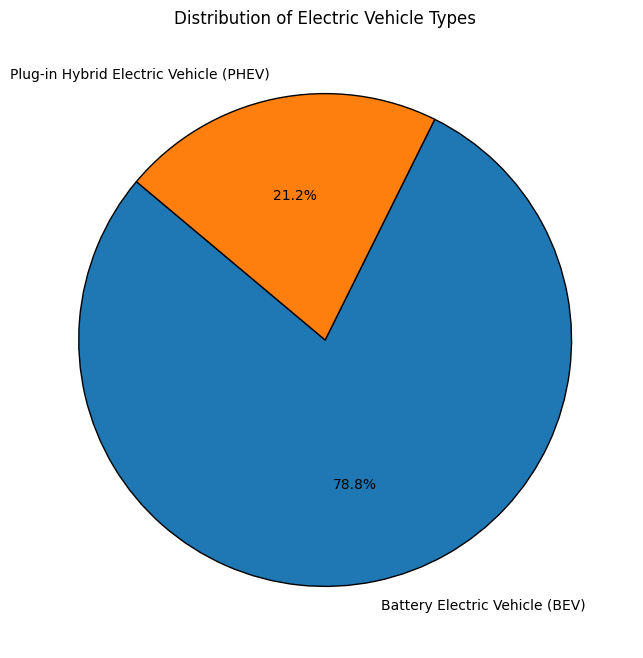

In [100]:
import matplotlib.pyplot as plt

labels = vehicle_type_distribution.index  
sizes = vehicle_type_distribution.values 

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',                          # Display percentages to 0.1%
    startangle=140,                             # Rotate start angle
    wedgeprops={'edgecolor': 'black'}           # Add border to slices
)


plt.title('Distribution of Electric Vehicle Types')

plt.show()



**QUESTION 1**: What is the total number of electric vehicles in the dataset, and how is this number distributed across different electric vehicle types (e.g., Battery Electric Vehicle, Plug-in Hybrid Electric Vehicle)?

**The total number of electric vehicles in the dataset is 210,165**.  This was calculated using len(df).  I assumed that each row contained a unique electric vehicle, so I started by calculating the overall length of the table.  To verify my answer, I ran unique_dol_count = df['DOL Vehicle ID'].nunique(), which gave me the unique number of DOL Vehicle IDs.  I found that this was also equal to 210165, which told me that DOL Vehicle Count is a primary key.  The same is not true of VIN 1-10, presumably because only displaying the first 10 digits of the VIN creates duplicate entries. 

I ran df['Electric Vehicle Type'].value_counts() to find the distribution of vehicle type (BEV versus PHEV).  I verified that the sum of these columns was 210165, as expected.  I found that **Battery Electric Vehicles (BEVs) number 165,554, while Plug-In Hybrid Electric Vehicles (PHEVs) number 44,611.** I displayed this distribution as a **pie chart (pictured above)** to visually represent the predominance of BEVs and to display the corresponding percentages. 

**Beginning of Question 2**: Which are the top 5 counties with the highest number of electric vehicles, and what
percentage of the total do they represent?

In [101]:
# Group by county, count number of electric vehicles
top_counties = df['County'].value_counts().head(5) 
print(f"Top 5 counties by number of electric vehicles:", top_counties)

Top 5 counties by number of electric vehicles: County
King         107115
Snohomish     25392
Pierce        16677
Clark         12537
Thurston       7719
Name: count, dtype: int64


In [102]:
# Calculate the sum of vehicles in the top five counties
top_counties_total = top_counties.sum()
print(f"The number of electric vehicles in the top five counties is", top_counties_total)

The number of electric vehicles in the top five counties is 169440


In [103]:
# Calculate the percentage of EVs in the top five counties
top_counties_percentage = (top_counties_total / total_vehicles)*100 
print(f"The percentage of electric vehicles concentrated in the top five counties is {top_counties_percentage:.1f} percent")

The percentage of electric vehicles concentrated in the top five counties is 80.6 percent


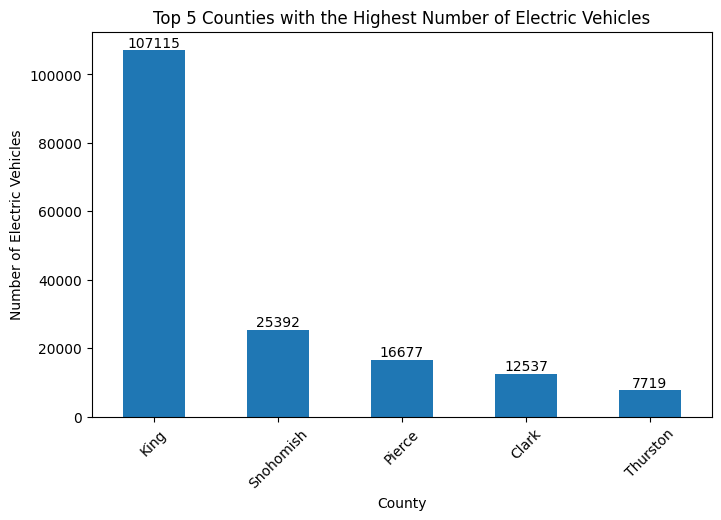

In [104]:
# Create a bar graph, set figure size
top_counties.plot(kind='bar', figsize=(8, 5))#                                     

# Display corresponding values above each bar
for i, value in enumerate(top_counties):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)
                                                                                    
    
plt.title('Top 5 Counties with the Highest Number of Electric Vehicles') 
plt.xlabel('County') 
plt.ylabel('Number of Electric Vehicles') 
plt.xticks(rotation=45)
plt.show() 

**QUESTION 2**: Which are the top 5 counties with the highest number of electric vehicles, and what
percentage of the total do they represent?

**The top 5 counties by number of electric vehicles are as follows**: King (107,115), Snohomish (25,392), Pierce (16,677), Clark (12,537), and Thurston (7,719).  I found these values by running df['County'].value_counts().  This grouped electric vehicle data by county and counted the total for each category.  Interestingly, King County is home to more than half of all electric vehicles in the entire dataset. 

**These five counties represent 80.6% of total electric vehicle ownership.**  I calculated this value by dividing top_counties_total by total_vehicles and multiplying by 100.  I used top_counties_percentage:.1f to display the percentage rounded to one decimal place.  

**The top five counties by electric vehicle ownership are visually displayed above as a bar graph.** For additional details on my bar graph code, please see the #comments in my code. 

**Beginning of Question 3**: How has the number of electric vehicle registrations changed over the years based on the "Model Year" field?

In [105]:
# Group data by model year, and sort it by index (ascending year)
model_year_trend = df['Model Year'].value_counts().sort_index() 
print(model_year_trend)

Model Year
1999        2
2000        7
2002        2
2003        1
2008       22
2010       24
2011      704
2012     1549
2013     4307
2014     3457
2015     4722
2016     5452
2017     8593
2018    14295
2019    10754
2020    12135
2021    19813
2022    28258
2023    60071
2024    35237
2025      760
Name: count, dtype: int64


In [106]:
# Confirm that the total number of EVs is correct
model_year_trend.sum() 

np.int64(210165)

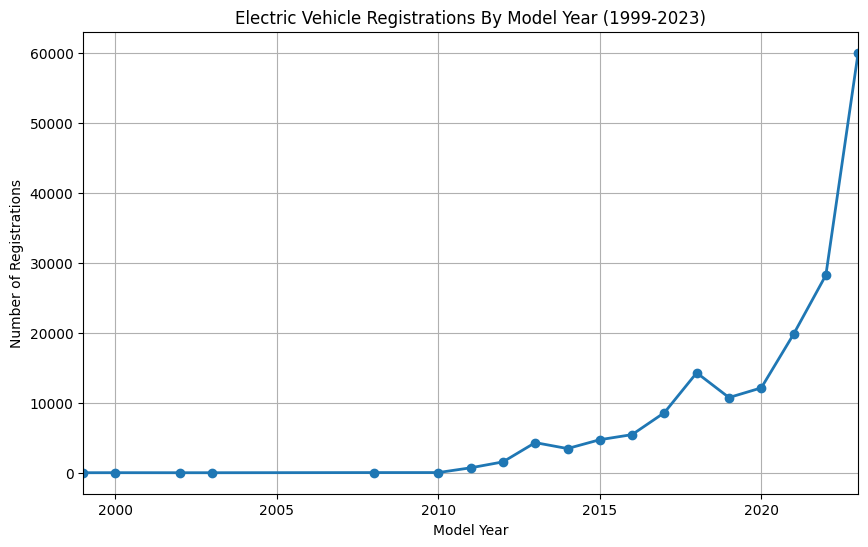

In [107]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(model_year_trend.index, model_year_trend.values, marker='o', linestyle='-', linewidth=2)

# Set x-axis limit to end at 2023
plt.xlim(model_year_trend.index.min(), 2023)

plt.title('Electric Vehicle Registrations By Model Year (1999-2023)')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()

**QUESTION 3**: How has the number of electric vehicle registrations changed over the years based on the "Model Year" field? 

**The number of electric vehicle registrations has drastically and consistently increased since 1999.**  Electric vehicle sales first topped 10,000 in 2018 and have continued to rise since then.  While only 2 EVs were registered in 1999, over 60,000 were registered in 2023 (a record year).  I gathered these trends by running model_year_trend = df['Model Year'].value_counts().sort_index().  This grouped the data by model year and sorted it by index (by year, ascending).  

**A line graph displays electric vehicle registrations from 1999 to 2023.** I chose to omit 2024 and 2025 from the visual because, presumably, not all vehicles from these years had been registered at the time the data was gathered.  Consequently, the numbers for those years falsely appear lower than they will ultimately be.  

The following years have no associated registrations: 2001, 2004-2007, and 2009.  While this could represent a source of error, it likely means that no electric vehicles were registered (and perhaps produced) in those years.  To confirm that no vehicles in the dataset were missing registration years, I ran model_year_trend.sum().  This showed 210,165, which equals the total number of electric vehicles in the dataset. 

**Beginning of Question 4**: What are the top 10 most common electric vehicle makes and models in the dataset?

In [108]:
# Concatenate "Make" and "Model" columns into a single column
df['Make_Model'] = df['Make'] + ' ' + df['Model']
make_model_trends = df['Make_Model'].value_counts().sort_index()
print(make_model_trends)

Make_Model
ACURA ZDX                        61
ALFA ROMEO TONALE                84
AUDI A3                         567
AUDI A7 E                        11
AUDI A8 E                         3
                               ... 
VOLVO V60                        79
VOLVO XC40                     1171
VOLVO XC60                     1371
VOLVO XC90                     1766
WHEEGO ELECTRIC CARS WHEEGO       3
Name: count, Length: 153, dtype: int64


In [109]:
# Confirm that the new "Make_Model" column contains the right total number of EVs
make_model_trends.sum()

np.int64(210165)

In [110]:
# Display all rows and columns of make_model_trends
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
print(make_model_trends)  

# Reset to default settings for printing number of rows and columns 
pd.reset_option('display.max_rows') 
pd.reset_option('display.max_columns') 

Make_Model
ACURA ZDX                                     61
ALFA ROMEO TONALE                             84
AUDI A3                                      567
AUDI A7 E                                     11
AUDI A8 E                                      3
AUDI E-TRON                                 1066
AUDI E-TRON GT                               149
AUDI E-TRON SPORTBACK                        174
AUDI Q4                                      439
AUDI Q5                                      142
AUDI Q5 E                                    946
AUDI Q8                                      422
AUDI RS E-TRON GT                             42
AUDI SQ8                                      16
AZURE DYNAMICS TRANSIT CONNECT ELECTRIC        4
BENTLEY BENTAYGA                               3
BENTLEY FLYING SPUR                            2
BMW 330E                                     505
BMW 530E                                     433
BMW 740E                                      30
BMW 745E 

In [111]:
# Print the top 10 make-models and their respective values
top_make_models = df['Make_Model'].value_counts().head(10)
print(top_make_models)

Make_Model
TESLA MODEL Y          44038
TESLA MODEL 3          32520
NISSAN LEAF            13606
TESLA MODEL S           7795
CHEVROLET BOLT EV       6780
TESLA MODEL X           6239
CHEVROLET VOLT          4815
VOLKSWAGEN ID.4         4716
FORD MUSTANG MACH-E     4363
JEEP WRANGLER           4116
Name: count, dtype: int64


In [112]:
# Filter Tesla models and combine all Tesla models into a single category
tesla_models = ['TESLA MODEL Y', 'TESLA MODEL X', 'TESLA MODEL 3', 'TESLA MODEL S'] 
tesla_data = df[df['Make_Model'].isin(tesla_models)]  

# Count combined number of Tesla makes/models
tesla_counts = tesla_data['Make_Model'].value_counts() 
tesla_total = tesla_counts.sum()
print(tesla_total)

90592


In [113]:
# Calculate non-Tesla total among the top ten
non_tesla_total = top_make_models.sum() - tesla_total 
print(non_tesla_total)

38396


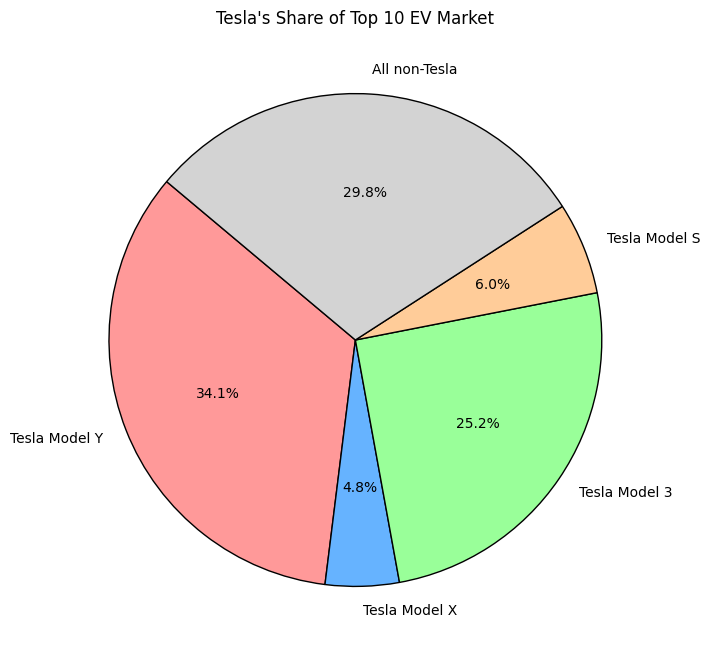

In [114]:
labels = ['Tesla Model Y', 'Tesla Model X', 'Tesla Model 3', 'Tesla Model S', 'All non-Tesla']

# Pie slices include the four Tesla models and the sum of all non-Tesla makes/models in the Top 10 list:
sizes = [
    tesla_counts.get('TESLA MODEL Y', 0),
    tesla_counts.get('TESLA MODEL X', 0),
    tesla_counts.get('TESLA MODEL 3', 0),
    tesla_counts.get('TESLA MODEL S', 0),
    non_tesla_total
] 

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=140,     
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#d3d3d3'],  
    wedgeprops={'edgecolor': 'black'}  
)


plt.title("Tesla's Share of Top 10 EV Market")

# Display the pie chart
plt.show()

**QUESTION 4**: What are the top 10 most common electric vehicle makes and models in the dataset?

**The top 10 most common makes and models are as follows**: 
TESLA MODEL Y          (44038),
TESLA MODEL 3          (32520),
NISSAN LEAF            (13606),
TESLA MODEL S           (7795),
CHEVROLET BOLT EV       (6780),
TESLA MODEL X           (6239),
CHEVROLET VOLT          (4815),
VOLKSWAGEN ID.4         (4716),
FORD MUSTANG MACH-E     (4363),
JEEP WRANGLER           (4116).

Clearly, **Tesla dominates the electric vehicle market**, especially among the top ten makes and models.  Of the top ten, 90,592 belong to Tesla, while 38,396 belong to other brands.  This data is a bit misleading when one zooms out to look at the entire dataset, though, since many makes/models have smaller shares of the market.  Out of the entire dataset, Tesla adds only an additional 49 to its top ten total (from Tesla Roadsters), bringing the Tesla total to 90,641 out of the overall 210,165 electric vehicles in the dataset.  

To find this data, I ran df['Make_Model'] = df['Make'] + ' ' + df['Model'] to concatenate the "Make" and "Model" columns of the dataset.  I printed the entire make_model_trends column (rather than just the head) to make sure I wasn't missing any duplicates or data errors (e.g., AUDI Q5, Audi q5, and AUDI Q 5 being classified as separate categories).  No errors were apparent.  I then ran top_make_models = df['Make_Model'].value_counts().head(10) to display the top ten make/model combinations. 

To get the Tesla data, I used tesla_models = ['TESLA MODEL Y', 'TESLA MODEL X', 'TESLA MODEL 3', 'TESLA MODEL S'] to filter all Tesla models and
tesla_data = df[df['Make_Model'].isin(tesla_models)] to combine all Teslas into one category. I was then able to obtain the non-Tesla total by running non_tesla_total = top_make_models.sum() - tesla_total.  

**My pie chart visually displays the four Tesla models and all non-Tesla models as shares of the top ten EV market.** I used the four Tesla models on the top ten list and non_tesla_total to make the visualization. 

**Beginning of Question 5**: What is the average electric range of vehicles in the dataset, and how does this vary across different makes?

In [115]:
# Calculate the overall average electric range for all data
overall_average_range = df['Electric Range'].mean() 

# Display the answer rounded to 2 decimal places
print(f"Overall average electric range: {overall_average_range:.2f} miles") 

Overall average electric range: 50.60 miles


In [116]:
# Group the results by make, sort in descending order
average_range_by_make = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False) 

# Note the presence of many zero values in the results
print(average_range_by_make) 

Make
JAGUAR                  204.379747
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
CHEVROLET                89.271224
FIAT                     83.174346
NISSAN                   74.836288
TESLA                    66.322569
SMART                    61.617886
AZURE DYNAMICS           56.000000
AUDI                     46.207694
PORSCHE                  43.321372
KIA                      37.465539
ALFA ROMEO               33.000000
CHRYSLER                 32.170947
DODGE                    32.000000
BMW                      31.649704
MITSUBISHI               31.058880
HONDA                    30.040359
LAND ROVER               29.666667
POLESTAR                 29.050384
TOYOTA                   27.692895
MAZDA                    25.658344
LINCOLN                  23.772727
JEEP                     22.319396
BENTLEY                  22.000000
LEXUS                    19.807740
VOLKSWAGEN               19.773301
HYUNDAI                  17.467040
VOLVO          

In [117]:
# Filter the data to eliminate zero values
filtered_data = df[df['Electric Range'] > 0] 
excluded_rows = len(df) - len(filtered_data)

# Print the number of zero values
print(f"Number of rows with zero Electric Range: {excluded_rows}") 

Number of rows with zero Electric Range: 118659


In [118]:
# Find the average electric range without zeros
average_range_no_zeros = filtered_data['Electric Range'].mean()

# Note that the value has changed significantly
print(f"The average range with zeros excluded is", average_range_no_zeros)

The average range with zeros excluded is 116.21715515922453


In [119]:
# Group the data that excludes zeros by make
average_range_by_make = filtered_data.groupby('Make')['Electric Range'].mean().sort_values(ascending=False) 

# Print the data.  \n sets a new line. 
print("\nAverage electric range by make (excluding zeros):") 
print(average_range_by_make)


Average electric range by make (excluding zeros):
Make
TESLA                   241.012089
JAGUAR                  234.000000
POLESTAR                233.000000
CHEVROLET               141.860559
VOLKSWAGEN              107.168697
NISSAN                  105.050539
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
FIAT                     85.626923
HYUNDAI                  84.859888
KIA                      83.415485
AUDI                     76.697830
PORSCHE                  71.199214
SMART                    61.869388
AZURE DYNAMICS           56.000000
MINI                     48.077151
HONDA                    46.574739
BMW                      46.257259
LEXUS                    36.897674
CADILLAC                 36.677778
MERCEDES-BENZ            34.541176
ALFA ROMEO               33.000000
FISKER                   33.000000
CHRYSLER                 32.170947
DODGE                    32.000000
TOYOTA                   31.370828
MITSUBISHI               31.058880

In [120]:
# Confirm the correct length of the filtered data without zero values
print(len(filtered_data))

91506


**QUESTION 5**: What is the average electric range of vehicles in the dataset, and how does this vary across different makes?

Initially, I used overall_average_range = df['Electric Range'].mean() to calculate the overall mean for all data.  I printed average_range_by_make = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False) to group by Make, obtain associated means, and print in descending order.  However, this revealed many zero values in the dataset.  I used df[df['Electric Range'] > 0 to filter the data, excluding zero values from the dataset.  I found that 118,659 rows had been excluded.  

**The overall average electric range of EV vehicles in the dataset, excluding zeros, is 116.22.**  I used average_range_no_zeros = filtered_data['Electric Range'].mean() to find this figure.  Next, I used filtered_data.groupby('Make')['Electric Range'].mean().sort_values(ascending=False) to once again group by Make and obtain associated means, this time excluding zeros.  

**Please see below the top five electric ranges by make.** Tesla, Jaguar, and Polestar produce vehicles whose ranges far exceed that of other makers.
TESLA                   (241.0),
JAGUAR                  (234.0),
POLESTAR                (233.0),
CHEVROLET               (141.9),
VOLKSWAGEN              (107.2).

**Contrast these with the bottom five electric ranges by make.** Tesla's average range is more than 14 times that of Subaru.  
FORD                     (25.6),
LINCOLN                  (23.8),
JEEP                     (22.3),
BENTLEY                  (22.0),
SUBARU                   (17.0).

**Because of the excluded zeros, only 43.5% of the total data was included in this analysis.** For that reason, I chose not to present a visualization, which might have been misleading. As shown in Question 6, the battery range for many vehicles had not yet been researched at the time this dataset was published. 

**Beginning of Question 6:** What percentage of vehicles in the dataset are eligible for the Clean Alternative Fuel Vehicle (CAFV) program?

In [121]:
# Find unique categories in the column
print(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique())

['Clean Alternative Fuel Vehicle Eligible'
 'Not eligible due to low battery range'
 'Eligibility unknown as battery range has not been researched']


In [122]:
# Find number of eligible EVs
eligible_vehicles = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible'] 
print(len(eligible_vehicles)) 

70035


In [123]:
# Find number of ineligible due to low battery range
low_battery = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range'] 
print(len(low_battery))

21476


In [124]:
# Find number of ineligible due to lack of research
range_unknown = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched'] 
print(len(range_unknown))

118654


In [125]:
total_vehicles = len(df)
num_eligible_vehicles = len(eligible_vehicles)

# Find percentage of eligible vehicles
cafv_eligible = (num_eligible_vehicles / total_vehicles) *100 
print(cafv_eligible)  

33.32381700092784


In [126]:
# Round percentage to two decimal places
print(f"Percentage of vehicles eligible for CAFV: {cafv_eligible:.2f}%") 

Percentage of vehicles eligible for CAFV: 33.32%


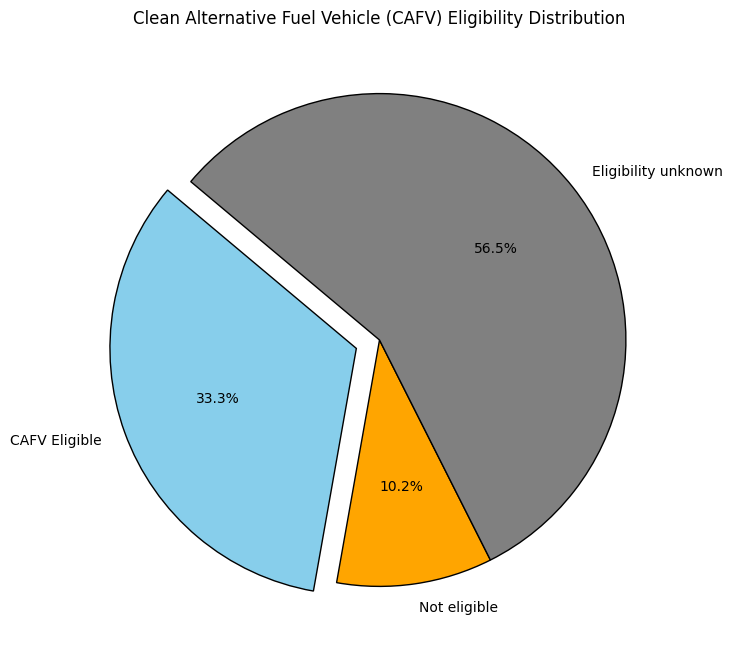

In [127]:
import matplotlib.pyplot as plt

# Count occurrences of each eligibility category
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Rename categories to shorten them in visual 
renamed_categories = {
    'Clean Alternative Fuel Vehicle Eligible': 'CAFV Eligible',
    'Not eligible due to low battery range': 'Not eligible',
    'Eligibility unknown as battery range has not been researched': 'Eligibility unknown'
}
cafv_counts = cafv_counts.rename(index=renamed_categories)

# Filter for only relevant categories
categories_of_interest = ['CAFV Eligible', 'Not eligible', 'Eligibility unknown']
cafv_counts_filtered = cafv_counts[categories_of_interest]

sizes = cafv_counts_filtered.values
labels = cafv_counts_filtered.index

# Explode the "CAFV Eligible" slice
explode = [0.1, 0, 0]  

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=140,
    explode=explode,  
    colors=['skyblue', 'orange', 'gray'],  
    wedgeprops={'edgecolor': 'black'}  
)

plt.title("Clean Alternative Fuel Vehicle (CAFV) Eligibility Distribution")

plt.show()


**QUESTION 6**: What percentage of vehicles in the dataset are eligible for the Clean Alternative Fuel Vehicle (CAFV) program?

To determine unique values within the CAFV Eligibility column, I ran print(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()). This gave me three categories: "Clean Alternative Fuel Vehicle Eligible," "Not eligible due to low battery range," and "Eligibility unknown as battery range has not been researched."  I also determined there were no null values, which I confirmed by adding len() of all three columns to get the expected 210,165 vehicles.  I used len() on each category individually to determine how many vehicles fell into each. 

**Of all vehicles listed in the dataset, 33.32% are listed as CAFV Eligible.**  To find this percentage, I ran total_vehicles = len(df) and
num_eligible_vehicles = len(eligible_vehicles).  I then divided num_eligible_vehicles by total_vehicles and multiplied by 100, using cafv_eligible:.2f to round to two decimal places.  

**Please see this data displayed visually as a pie chart.**  See comments in my code for more details about building the pie chart.  I used renamed_categories to shorten the categories for practical display purposes.  I used explode = [0.1, 0, 0] to make the eligible vehicles slice pop out for emphasis.  In another context, I might have chosen to "explode" the eligibility unknown slice.  Since more than 50% of electric vehicles have been insufficiently researched to qualify for the CAFV program, this is an area of opportunity in the EV sector.  



**Beginning of Question 7**: Is there a correlation between a vehicle's electric range and its base MSRP?

In [128]:
# Filter the MSRP column to eliminate zero values
filtered_msrp = df[df['Base MSRP'] > 0]
print(filtered_msrp.head())

     VIN (1-10)    County       City State  Postal Code  Model Year   Make  \
13   5YJSA1DPXC  Thurston    Olympia    WA      98502.0        2012  TESLA   
92   WBAJA9C51J  Thurston      Lacey    WA      98516.0        2018    BMW   
268  5YJSA1CP0C      King  Sammamish    WA      98074.0        2012  TESLA   
284  KNDJX3AE5G      King   Kirkland    WA      98034.0        2016    KIA   
290  WBA8E1C52J      King    Seattle    WA      98101.0        2018    BMW   

       Model                   Electric Vehicle Type  \
13   MODEL S          Battery Electric Vehicle (BEV)   
92      530E  Plug-in Hybrid Electric Vehicle (PHEV)   
268  MODEL S          Battery Electric Vehicle (BEV)   
284     SOUL          Battery Electric Vehicle (BEV)   
290     330E  Plug-in Hybrid Electric Vehicle (PHEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
13            Clean Alternative Fuel Vehicle Eligible           265.0   
92              Not eligible due to low battery 

In [129]:
# Calculate the number of rows with nonzero MSRP values
# Note how many zero values there are - only ~3,300 out of ~210,000 are nonzero
print(len(filtered_msrp))

3309


In [130]:
# Calculate the number of rows with zero MSRP
num_filtered_msrp = len(filtered_msrp)
print(total_vehicles - num_filtered_msrp) 

206856


In [131]:
# Rename nonzero Electric Range values
filtered_range = filtered_data 
print(len(filtered_range))

91506


In [132]:
# Find rows that contain nonzero values for both electric range and MSRP
filtered_combined = df[(df['Base MSRP'] > 0) & (df['Electric Range'] > 0)]
print(filtered_combined.head())

     VIN (1-10)    County       City State  Postal Code  Model Year   Make  \
13   5YJSA1DPXC  Thurston    Olympia    WA      98502.0        2012  TESLA   
92   WBAJA9C51J  Thurston      Lacey    WA      98516.0        2018    BMW   
268  5YJSA1CP0C      King  Sammamish    WA      98074.0        2012  TESLA   
284  KNDJX3AE5G      King   Kirkland    WA      98034.0        2016    KIA   
290  WBA8E1C52J      King    Seattle    WA      98101.0        2018    BMW   

       Model                   Electric Vehicle Type  \
13   MODEL S          Battery Electric Vehicle (BEV)   
92      530E  Plug-in Hybrid Electric Vehicle (PHEV)   
268  MODEL S          Battery Electric Vehicle (BEV)   
284     SOUL          Battery Electric Vehicle (BEV)   
290     330E  Plug-in Hybrid Electric Vehicle (PHEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
13            Clean Alternative Fuel Vehicle Eligible           265.0   
92              Not eligible due to low battery 

In [133]:
# Print the number of nonzero MSRP entries with a nonzero electric range
# Note that all nonzero MSRP entries appear to have a nonzero electric range
combined_nonzero = len(filtered_combined) 
print(combined_nonzero)

3309


In [134]:
# Find the correlation between MSRP and Electric Range within the nonzero data
correlation = filtered_combined['Electric Range'].corr(filtered_combined['Base MSRP']) 
print(f"Correlation between Electric Range and Base MSRP: {correlation:.2f}")

Correlation between Electric Range and Base MSRP: 0.40


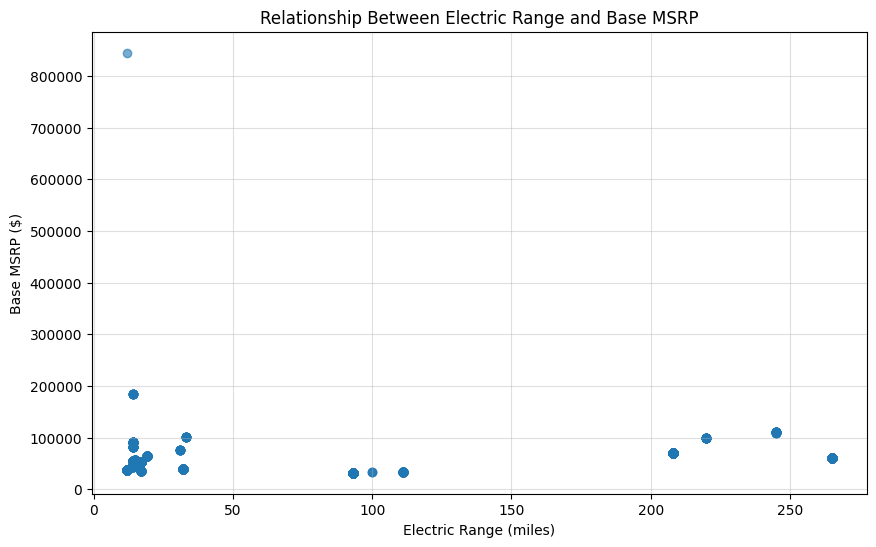

In [135]:
# Create a scatter plot with nonzero MSRP and electric range data
# Note the presence of one or more outliers in the scatter plot

plt.figure(figsize=(10, 6)) 
plt.scatter(filtered_combined['Electric Range'], filtered_combined['Base MSRP'], alpha=0.6)
plt.title('Relationship Between Electric Range and Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.grid(alpha=0.4)
plt.show()

In [136]:
# Find MSRPs above 200K (in order to investigate outliers)
# Note that only one outlier is found
msrp_above_200k = filtered_combined[filtered_combined['Base MSRP'] > 200000]   
num_msrp_above_200k = len(msrp_above_200k)
print(num_msrp_above_200k) 

1


In [137]:
# Print the outlier
# This Porsche affects our data b/c MSRP is 845K and electric range is only 12
msrp_above_200k.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Make_Model
68087,WP0CA2A13F,King,Hunts Point,WA,98004.0,2015,PORSCHE,918,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12.0,845000.0,48.0,100479039,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,PORSCHE 918


In [138]:
# Re-run the correlation analysis without the outlier
filtered_combined_no_outlier = filtered_combined[filtered_combined['Base MSRP'] <= 200000] 
correlation_no_outlier = filtered_combined_no_outlier['Electric Range'].corr(filtered_combined_no_outlier['Base MSRP'])
print(f"Correlation between Electric Range and Base MSRP (excluding outlier): {correlation_no_outlier:.2f}") 

Correlation between Electric Range and Base MSRP (excluding outlier): 0.52


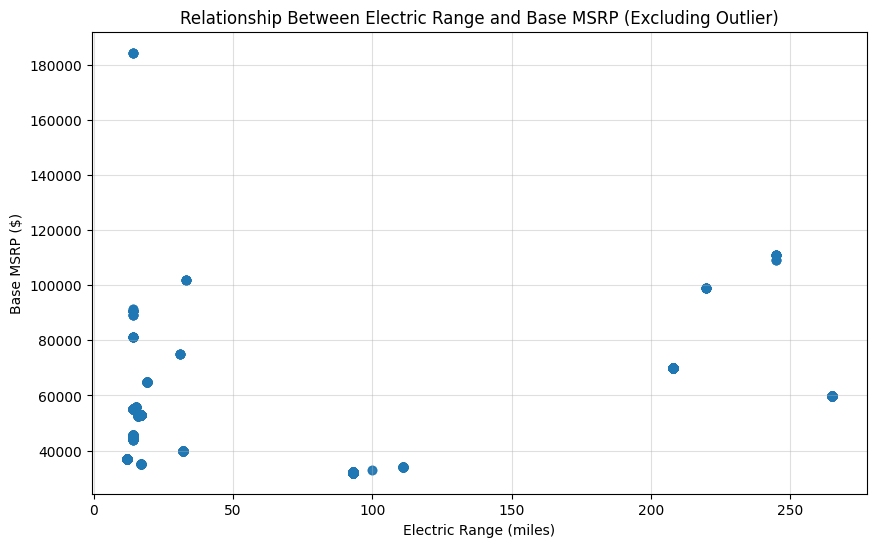

In [139]:
# Re-run the scatter plot without the outlier
plt.figure(figsize=(10, 6)) 
plt.scatter(
    filtered_combined_no_outlier['Electric Range'], 
    filtered_combined_no_outlier['Base MSRP'], 
    alpha=0.6
)
plt.title('Relationship Between Electric Range and Base MSRP (Excluding Outlier)')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.grid(alpha=0.4)
plt.show()

In [140]:
# Print the first 20 rows of the scatter plot data
print(filtered_combined_no_outlier.head(20))  

      VIN (1-10)    County               City State  Postal Code  Model Year  \
13    5YJSA1DPXC  Thurston            Olympia    WA      98502.0        2012   
92    WBAJA9C51J  Thurston              Lacey    WA      98516.0        2018   
268   5YJSA1CP0C      King          Sammamish    WA      98074.0        2012   
284   KNDJX3AE5G      King           Kirkland    WA      98034.0        2016   
290   WBA8E1C52J      King            Seattle    WA      98101.0        2018   
345   5YJSA1DP1D      King             Burien    WA      98166.0        2013   
347   YV4BR0PL7J      King            Seattle    WA      98117.0        2018   
365   YV4BR0PLXJ    Island      Camano Island    WA      98282.0        2018   
384   5YJSA1DN8D      King           Bellevue    WA      98004.0        2013   
414   WBA8E1C58J     Clark          Vancouver    WA      98685.0        2018   
555   5YJSA1CN7D      King           Bellevue    WA      98004.0        2013   
655   5YJSA1DP5D      King             B

**QUESTION 7**: Is there a correlation between a vehicle's electric range and its base MSRP?

**Electric range and base MSRP are positively correlated.**  A correlation analysis was run between nonzero Electric Range values and nonzero Base MSRP values.  This analysis produced a Pearson correlation coefficient of .40, which is considered a moderate correlation.  Upon creating a scatter plot, I discovered the presence of at least one outlier.  I discovered that a single outlier had a considerable effect on the correlation coefficient.  I re-ran the analysis, excluding this outlier (a Porsche with MSRP $845,000 and Electric Range of 12 miles). 

**When excluding the single Porsche outlier from the analysis, the correlation coefficient rises to .52.**  This is still a moderate correlation but is significantly stronger than the .40 value that includes the outlier.  Since this MSRP is more than four times higher than the next highest in the dataset, the decision to exclude it is justified.  

**The second scatter plot (directly above this markdown) shows the data plotted without the outlier.** The data is presented in a more practical way here since the range of the y-axis is more appropriate.  

To run the initial analysis, I used filtered_combined = df[(df['Base MSRP'] > 0) & (df['Electric Range'] > 0)] to find vehicles with a nonzero value for both Base MSRP and Electric Range.  I used len() to find the number of vehicles in filtered_combined, which is 3,309.  This is the same number of vehicles that have nonzero Base MSRP (also found using len()), which means that all nonzero Base MSRP vehicles also have a nonzero Electric Range.  

I ran .corr() to find the correlation between Base MSRP and Electric Range in filtered_combined.  This produced the initial correlation coefficient of .40.  When the scatter plot revealed outlier(s), I ran msrp_above_200k = filtered_combined[filtered_combined['Base MSRP'] > 200000] and len() to find those vehicles with an MSRP above $200,000.  This revealed only a single outlier: the Porsche.  

I reran the correlation analysis to exclude the outlier using correlation_no_outlier = filtered_combined_no_outlier['Electric Range'].corr(filtered_combined_no_outlier['Base MSRP']).  This brought the coefficient up to .52.  I printed a new scatter plot using matplotlib to exclude the outlier.  Printing a head() of the scatter plot data revealed that there are likely many identical data points due to repeating MSRP and Electric Range values.  This explains why there seem to be relatively few data points on the plot. 

**A final note: because this correlation analysis only used nonzero values, it included only 1.57% of all vehicles in the dataset.**  It would be wise to re-run these analyses after accounting for the missing data - that is, obtaining electric range and MSRP values for the vehicles that are currently listed as zero.    

**Beginning of Question 8**: Which electric utility company has the highest number of electric vehicles in its service area?

In [141]:
# Group by the column "Electric Utility" and display counts for each category
utility_counts = df['Electric Utility'].value_counts() 
print(utility_counts)

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                 76606
PUGET SOUND ENERGY INC                                                                                        43318
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                  36246
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                              12234
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                9343
                                                                                                              ...  
BONNEVILLE POWER ADMINISTRATION||BENTON RURAL ELECTRIC ASSN                                                       4
CITY OF SEATTLE - (WA)                                                                                            2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF JEFFERSON 

In [142]:
# Display all rows
pd.set_option('display.max_rows', None) 
utility_counts = df['Electric Utility'].value_counts()
print(utility_counts)

# Reset display option to default
pd.reset_option('display.max_rows')

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                       76606
PUGET SOUND ENERGY INC                                                                                              43318
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                        36246
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                                    12234
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                      9343
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                                                   4824
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY                                           3470
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                                                           1867
PACIFIC

In [143]:
# Filter rows where "Electric Utility" contains "Puget" (not case-sensitive)
puget_entries = df[df['Electric Utility'].str.contains('PUGET', case=False, na=False)]

# Count the number of rows
num_puget_entries = len(puget_entries)
print(f"\nNumber of entries with 'Puget' in the Electric Utility column: {num_puget_entries}") 


Number of entries with 'Puget' in the Electric Utility column: 125858


In [144]:
# Filter rows where "Electric Utility" contains "Bonneville"
bonneville_entries = df[df['Electric Utility'].str.contains('BONNEVILLE', case=False, na=False)]

# Count the number of rows
num_bonneville_entries = len(bonneville_entries)
print(f"\nNumber of entries with 'Bonneville' in the Electric Utility column: {num_bonneville_entries}")


Number of entries with 'Bonneville' in the Electric Utility column: 41450


In [145]:
# Print percentage of all vehicles serviced by Puget
print((num_puget_entries/total_vehicles)*100) 

59.88532819451383


**QUESTION 8**: Which electric utility company has the highest number of electric vehicles in its service area?

**Puget Sound Energy has the highest number of electric vehicles in its service area.**  I used df['Electric Utility'].value_counts() to display values associated with each utility company listed in the "Electric Utility" column.  This showed PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA) at the top of the list, with 76,606 electric vehicles.  

Next, I found the value for Puget's entire service area rather than just the city of Tacoma.  I ran the same value_counts() analysis but this time used pd.set_option('display.max_rows', None) so that all 74 unique entries would be displayed.  These 74 categories can be grouped into several utility companies: Puget Sound Energy, Bonneville Power Administration, PacifiCorp, Avista, Modern Electric, and publicly owned utilities (those beginning with "PUD" or "City of").  

I used df[df['Electric Utility'].str.contains('PUGET', case=False, na=False)] to identify all entries containing "Puget" (not case sensitive) in order to conglomerate the various Puget Sound Energy categories.  This revealed that more than half of all vehicles in the dataset are serviced by Puget.  I ran a similar analysis on all entries containing "Bonneville," though this was unnecessary given my results with Puget. 

**Overall, Puget Sound Energy services 59.9% of electric vehicles in the dataset, or 125,858 vehicles.**  This number could theoretically be higher if Puget is not explicitly listed in any other categories of the dataset (some entries display multiple companies, such as "BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)").  However, all of the "Puget" categories explicitly list Puget and no other company, so they can be counted for Puget.  Therefore, Puget covers a majority of vehicles in the dataset. 

I chose not to include a visualization due to the ambiguity of the data (more than one utility company being represented in some entries).

**Beginning of Question 9**: What is the distribution of electric vehicles across different ZIP codes, and which ZIP codes have the highest concentration of EVs?

In [146]:
# Find the number of unique ZIP codes in the dataset
zip_code_counts = df['Postal Code'].value_counts() 
num_zip_code = len(zip_code_counts)
print(num_zip_code)

931


In [147]:
# Display the top ten ZIP codes and their respective values
top_zip_codes = zip_code_counts.head(10)
print(top_zip_codes)

Postal Code
98052.0    5256
98012.0    3959
98033.0    3486
98006.0    3314
98188.0    3229
98004.0    3209
98115.0    3103
98074.0    2863
98072.0    2779
98034.0    2675
Name: count, dtype: int64


In [148]:
# Find the number of EVs represented within the top 10 ZIP codes
top_zip_codes.sum() 

np.int64(33873)

In [149]:
# Find the number of vehicles located in each state
state_counts = df['State'].value_counts() 
print(state_counts)

State
WA    209720
CA       113
VA        60
MD        37
TX        28
NC        19
CO        17
FL        12
IL        10
GA        10
AZ         9
AL         9
CT         8
MO         7
NJ         7
NY         7
NV         7
HI         6
SC         6
OR         6
MI         6
KY         5
ID         5
MA         4
IN         4
OH         4
UT         4
PA         3
RI         3
DC         3
KS         3
LA         3
AR         3
DE         2
NM         2
BC         2
NE         1
NH         1
NS         1
TN         1
MN         1
OK         1
AK         1
IA         1
AE         1
WY         1
WI         1
Name: count, dtype: int64


In [150]:
# Find the number of unique Washington ZIP codes
washington_data = df[df['State'] == 'WA']   
unique_zip_codes_wa = washington_data['Postal Code'].nunique()
print(unique_zip_codes_wa)

564


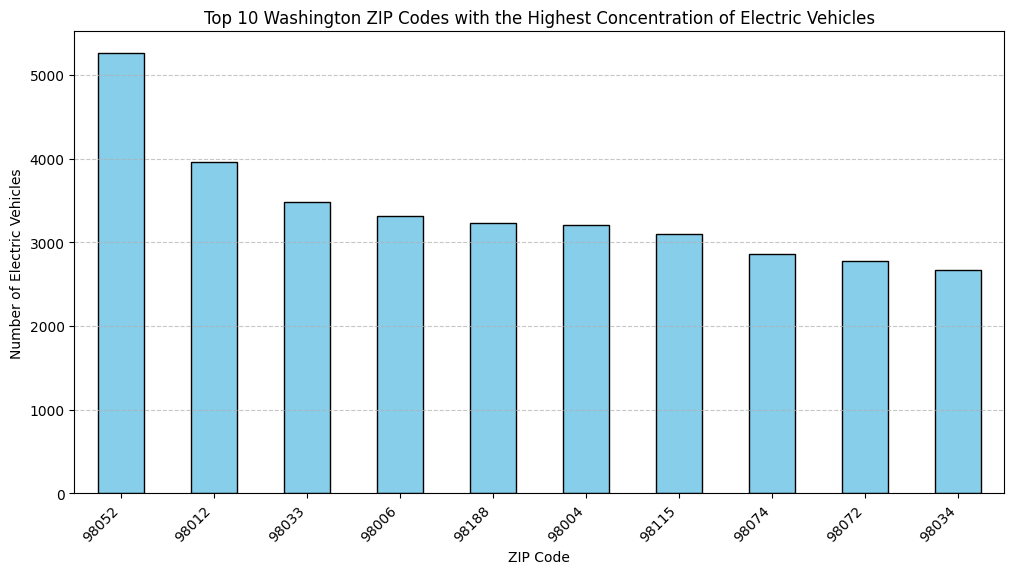

In [151]:
# Convert ZIP codes to integer and then string format to remove decimals
top_zip_codes.index = top_zip_codes.index.astype(float).astype(int).astype(str)

# Create bar graph
plt.figure(figsize=(12, 6))
top_zip_codes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Washington ZIP Codes with the Highest Concentration of Electric Vehicles')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**QUESTION 9**: What is the distribution of electric vehicles across different ZIP codes, and which ZIP codes have the highest concentration of EVs?

**Overall, 931 ZIP codes are represented in the dataset, each with at least one electric vehicle.  Of these, 564 ZIP codes are located in Washington State.**  The Washington State ZIP codes contain 209,720 EVs in total.  These represent 99.8% of all EVs in the dataset, making Washington ZIP codes the natural focus of further analysis.  

Washington State has approximately 715 ZIP codes in total, of which 598 are standard ZIP codes (business/residential).  Further research could be conducted to determine whether the 564 represented in this dataset are all standard ZIP codes.  If so, this would mean that 94.3% of Washington's standard ZIP codes are home to at least one electric vehicle.  In any case, EVs are represented in 78.9% of Washington's ZIP codes, standard or otherwise.  

**The top ten postal codes based on concentration of EVs are as follows:** 
ZIP      EVs
98052    (5256),
98012    (3959),
98033    (3486),
98006    (3314),
98188    (3229),
98004    (3209),
98115    (3103),
98074    (2863),
98072    (2779),
98034    (2675).

**The top ten (all located in Washington) are depicted visually as a bar graph above.**

To find the number of unique ZIP codes in the dataset, I ran zip_code_counts = df['Postal Code'].value_counts() and len(zip_code_counts).  I printed .head(10) to get a list of the top ten ZIP codes by concentration of EVs.  Using top_zip_codes.sum(), I found that 33,873 vehicles (16.1%) fall into these top ten postal codes.  

I used df['State'].value_counts() to determine how many vehicles were in Washington state and elsewhere.  After determining that Washington represented an overwhelming majority, I ran washington_data = df[df['State'] == 'WA'] and unique_zip_codes_wa = washington_data['Postal Code'].nunique().  This revealed that 564 unique ZIP codes in the dataset are located in Washington.  

**Finally, I created a bar graph using the top ten data.**  Please see my bar graph code for more details.  For the bar graph, I converted ZIP codes to string format in order to eliminate decimals. 

**Beginning of Question 10**: What is the oldest and newest model year in the dataset?

In [152]:
# Find the oldest (min) and newest (max) model year in the dataset
oldest_model_year = df['Model Year'].min()
newest_model_year = df['Model Year'].max()

print(f"The oldest model year in the dataset is: {oldest_model_year}")
print(f"The newest model year in the dataset is: {newest_model_year}")

The oldest model year in the dataset is: 1999
The newest model year in the dataset is: 2025


**QUESTION 10:** What is the oldest and newest model year in the dataset?

**The oldest model year in the dataset is 1999, and the newest model year is 2025.**  The oldest model year was found using df['Model Year'].min(), and the newest model year was found using df['Model Year'].max().  This data had also been calculated earlier in Question 3, using model_year_trend to show all given model years and the number of EVs for each year.   

Since model year data is included in the visualization for Question 3, I did not create a separate visualization for this question. 

**Beginning of Question 11**: Which city has the highest number of electric vehicles?

In [153]:
# Group by city, count number of EVs in each city
city_counts = df['City'].value_counts()

# Find the city with the highest number of EVs
top_city = city_counts.idxmax()
print(top_city)

Seattle


In [154]:
# Find the number of EVs in the top city (Seattle)
top_city_count = city_counts.max()
print(top_city_count)

33854


In [155]:
# Display the top 10 cities by number of EVs
top_10_cities = city_counts.head(10) 
print(top_10_cities)

City
Seattle      33854
Bellevue     10414
Vancouver     7475
Redmond       7438
Bothell       6877
Renton        6132
Kirkland      6093
Sammamish     5995
Olympia       5079
Tacoma        4454
Name: count, dtype: int64


In [156]:
# Find the number of unique cities listed in the dataset
num_city_counts = len(city_counts) 
print(num_city_counts)

758


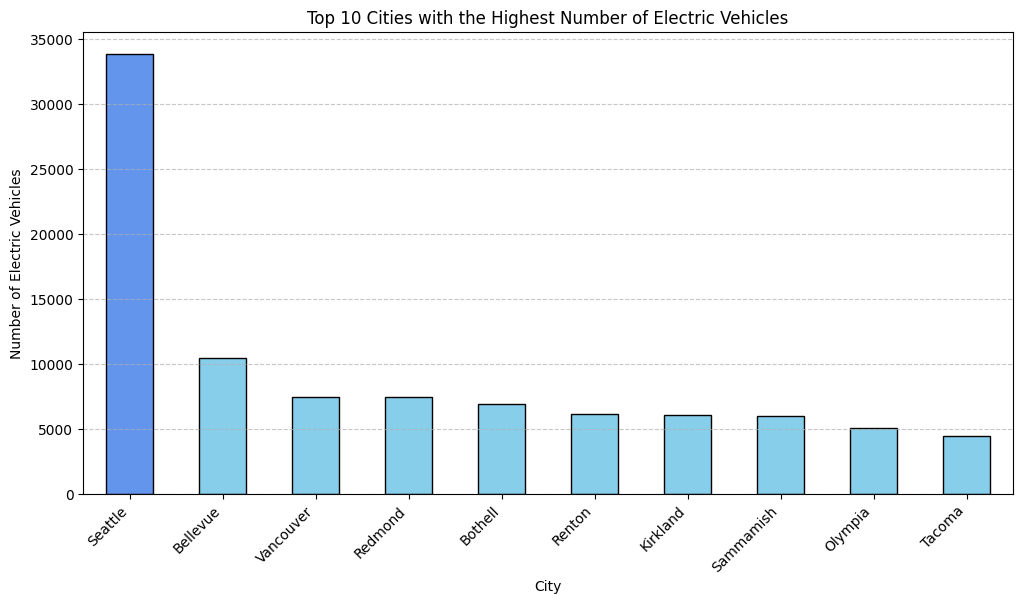

In [157]:
# Set Seattle as a different color in order to highlight it as the top city
colors = ['skyblue' if city != 'Seattle' else 'cornflowerblue' for city in top_10_cities.index]

# Plot a bar chart
plt.figure(figsize=(12, 6))
top_10_cities.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Top 10 Cities with the Highest Number of Electric Vehicles')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')  

plt.grid(axis='y', linestyle='--', alpha=0.7)                    
plt.show()

**QUESTION 11**: Which city has the highest number of electric vehicles?

**Seattle has the highest number of EVs in the dataset, with 33,854 vehicles.**  This represents 16.1% of all vehicles in the dataset.  Nearly one-sixth of all EVs in Washington State are in Seattle.  The next city on the list, Bellevue, has 10,414 EVs - less than one-third the amount that Seattle has.  

I used city_counts = df['City'].value_counts() to group by city and count the number of EVs in each.  I then found the city with the highest number of EVs by using city_counts.idxmax(), which returned the city name of Seattle.  The number of EVs in the top city was determined by running city_counts.max().  

I expanded my analysis to include the top ten cities by running top_10_cities = city_counts.head(10).  I used len(city_counts) to find the number of unique cities listed in the dataset, which is 758.  

**The bar graph above shows the top 10 cities with their respective numbers of EVs.**  Please see the associated code for more details about the bar graph.  I used royal blue for Seattle to highlight its status as the city with the highest number of electric vehicles.  

**Beginning of Question 12**: What is the most common electric vehicle model in the dataset?

In [158]:
# Group by model, count number of EVs in each model, and return the maximum value (most common model)
most_common_model = df['Model'].value_counts().idxmax() 
print(most_common_model)

MODEL Y


In [159]:
# Perform the same function as above, this time using "Make_Model" instead of "Model"
most_common_model = df['Make_Model'].value_counts().idxmax() 

In [160]:
print(most_common_model)

TESLA MODEL Y


In [161]:
# Display the number of EVs in the most common category (Tesla Model Y)
most_common_model_count = df['Model'].value_counts().max()
print(most_common_model_count)

44038


In [162]:
# Verify that the same analysis using "Make_Model" returns the same value
most_common_model_count = df['Make_Model'].value_counts().max()
print(most_common_model_count)

44038


In [163]:
# Reprint a list of top 10 makes/models (originally found in Question 4)
print(top_make_models) 

Make_Model
TESLA MODEL Y          44038
TESLA MODEL 3          32520
NISSAN LEAF            13606
TESLA MODEL S           7795
CHEVROLET BOLT EV       6780
TESLA MODEL X           6239
CHEVROLET VOLT          4815
VOLKSWAGEN ID.4         4716
FORD MUSTANG MACH-E     4363
JEEP WRANGLER           4116
Name: count, dtype: int64


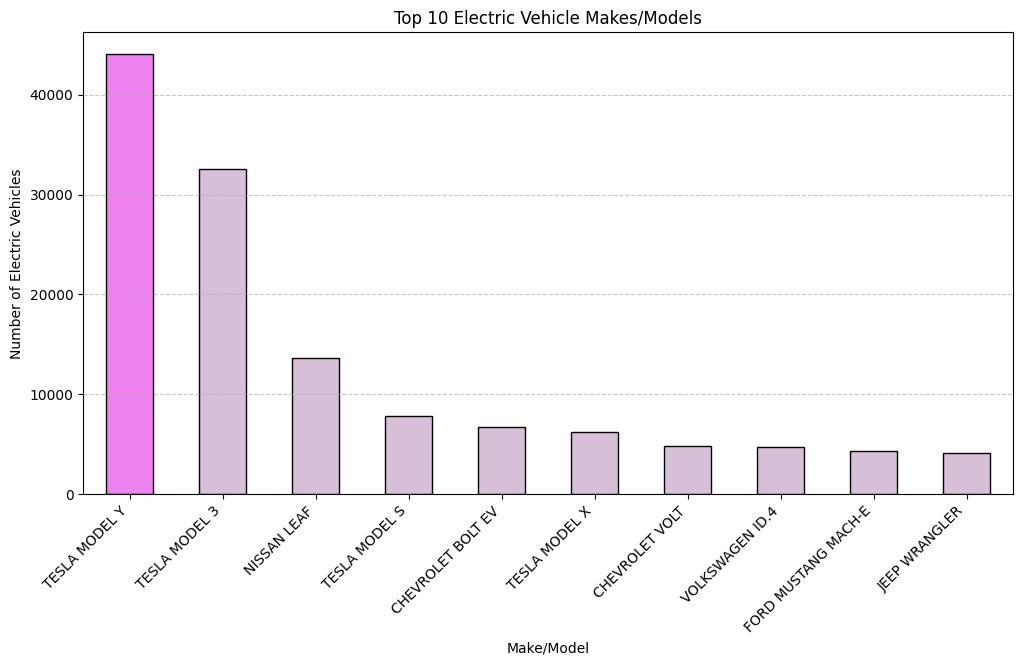

In [164]:
# Set Tesla Model Y as a different color to make it stand out
colors = ['thistle' if make_model != 'TESLA MODEL Y' else 'violet' for make_model in top_make_models.index] 

# Plot a bar chart
plt.figure(figsize=(12, 6))
top_make_models.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Top 10 Electric Vehicle Makes/Models')
plt.xlabel('Make/Model')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')  

plt.grid(axis='y', linestyle='--', alpha=0.7)                          # Alpha = transparency or opaqueness
plt.show()

**QUESTION 12**: What is the most common electric vehicle model in the dataset? 

**The most common electric vehicle model in the dataset is the Tesla Model Y, with 44,038 EVs.**  Tesla Model Ys represent 20.1% of all EVs in the dataset.  I had obtained this data in Question 4, where I combined makes and models into a single column and listed the top ten makes/models.

Here, I used .value_counts().idxmax() to confirm.  This function groups EVs by model and returns the model name with the highest number of EVs.  I ran this analysis with both the "Model" and the "Make_Model" columns to confirm a matching value.  They returned "Model Y" and "Tesla Model Y" as expected.  I then used .value_counts().max() to return the number of EVs in the highest model category.  Again, I used both "Model" and "Make_Model"; both returned 44,038 EVs.  

I reprinted top_make_models (last printed in Question 4) for reference.  This allowed me to see the top 10 make-model combinations and their respective EV numbers.  I chose to focus on the top 10 models in my visualization, since I had focused on the predominance of Tesla EVs in Question 4.  

**A bar graph displays the top 10 make-model combinations, highlighting Tesla Model Y as the most common EV model.**  I colored Tesla Model Y violet to contrast with the remaining nine models, which are colored thistle.  Please see my bar graph code for more details.  

**Beginning of Question 13**: How many different makes of electric vehicles are represented in the dataset?

In [165]:
# Count the number of unique makes in the "Make" column
unique_makes_count = df['Make'].nunique() 
print(unique_makes_count)

43


In [166]:
# Group by make, display number of EVs per make
make_counts = df['Make'].value_counts()

# Display all rows, then reset display settings to default
pd.set_option('display.max_rows', None)
print(make_counts)
pd.reset_option('display.max_rows')

Make
TESLA                   91379
CHEVROLET               15419
NISSAN                  14721
FORD                    11138
KIA                      9576
BMW                      8607
TOYOTA                   8248
HYUNDAI                  6068
RIVIAN                   5883
VOLKSWAGEN               5783
JEEP                     5501
VOLVO                    5073
AUDI                     3977
CHRYSLER                 3738
MERCEDES-BENZ            1966
SUBARU                   1406
HONDA                    1338
PORSCHE                  1259
POLESTAR                 1171
MITSUBISHI               1036
MINI                     1029
CADILLAC                  832
FIAT                      803
LEXUS                     801
MAZDA                     761
DODGE                     682
LINCOLN                   308
LUCID                     304
GENESIS                   281
SMART                     246
JAGUAR                    237
FISKER                    188
GMC                       167
ALFA 

In [167]:
# Verify total number of EVs in make_counts is correct
make_counts.sum() 

np.int64(210165)

In [168]:
# Display the top 10 makes and the corresponding number of EVs
top_10_makes = make_counts.head(10) 
print(top_10_makes)

Make
TESLA         91379
CHEVROLET     15419
NISSAN        14721
FORD          11138
KIA            9576
BMW            8607
TOYOTA         8248
HYUNDAI        6068
RIVIAN         5883
VOLKSWAGEN     5783
Name: count, dtype: int64


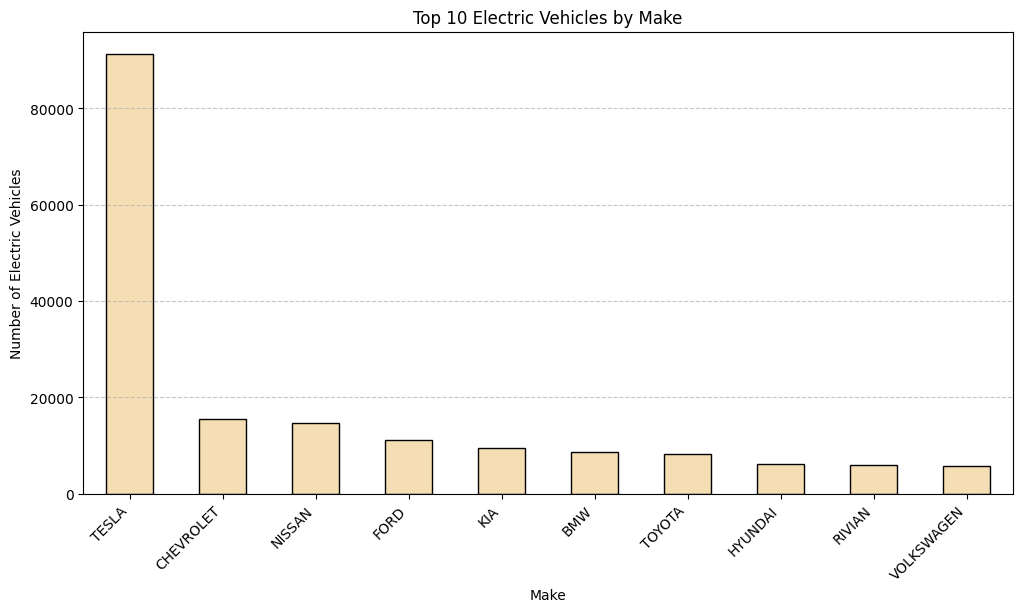

In [169]:
# Create a vertical bar graph
plt.figure(figsize=(12, 6))
top_10_makes.plot(kind='bar', color='wheat', edgecolor='black')
plt.title('Top 10 Electric Vehicles by Make')
plt.xlabel('Make')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.show()

**QUESTION 13**: How many different makes of electric vehicles are represented in the dataset?

**In the dataset, 43 different makes of EVs are represented.**  I used df['Make'].nunique() to count the number of unique makes in the "Make" column. I then used df['Make'].value_counts() to display the number of EVs associated with each make, setting pandas to display all 43 rows.  I made sure there were no duplicates listed as separate rows (for example, "MERCEDES" versus "MERCEDES-BENZ").  I used sum() to make sure all 210,165 EVs in the dataset were accounted for.   

**The bar graph above shows the top 10 makes and corresponding EV numbers.** I ran top_10_makes = make_counts.head(10) to return the top 10 data.  I then used matplotlib to create a vertical bar graph depicting the top 10 makes.  Tesla dominates with 91,379 EVs, making up 43.5% of the EV market.  The next most common make, Chevrolet, makes up only 7.3% of the market with 15,419 EVs.

**Beginning of Question 14**: What is the range of base MSRP for electric vehicles in the dataset, and what is the average MSRP?

In [170]:
# Find the lowest MSRP using filtered data from earlier, which excludes zero values
msrp_min = filtered_msrp['Base MSRP'].min() 
print(msrp_min)

31950.0


In [171]:
# Find the highest MSRP using filtered data
msrp_max = filtered_msrp['Base MSRP'].max()
print(msrp_max)

845000.0


In [172]:
# Exclude the Porsche outlier, found in Question 7
filtered_msrp_no_outlier = filtered_msrp[filtered_msrp['Base MSRP'] < 200000] 

In [173]:
# Find the highest MSRP, excluding the outlier
msrp_max_no_outlier = filtered_msrp_no_outlier['Base MSRP'].max() 
print(msrp_max_no_outlier)

184400.0


In [174]:
# Find the range (max minus min) with the outlier included
range_with_outlier = msrp_max - msrp_min 
print(range_with_outlier)

813050.0


In [175]:
# Find the range (max minus min) with the outlier excluded
range_no_outlier = msrp_max_no_outlier - msrp_min 
print(range_no_outlier)

152450.0


In [176]:
# Find the average MSRP with the outlier included 
msrp_average_with_outlier = filtered_msrp['Base MSRP'].mean()
print(msrp_average_with_outlier)

57012.926866122696


In [177]:
# Find the average MSRP with the outlier excluded
msrp_average_no_outlier = filtered_msrp_no_outlier['Base MSRP'].mean()
print(msrp_average_no_outlier)

56774.720374848854


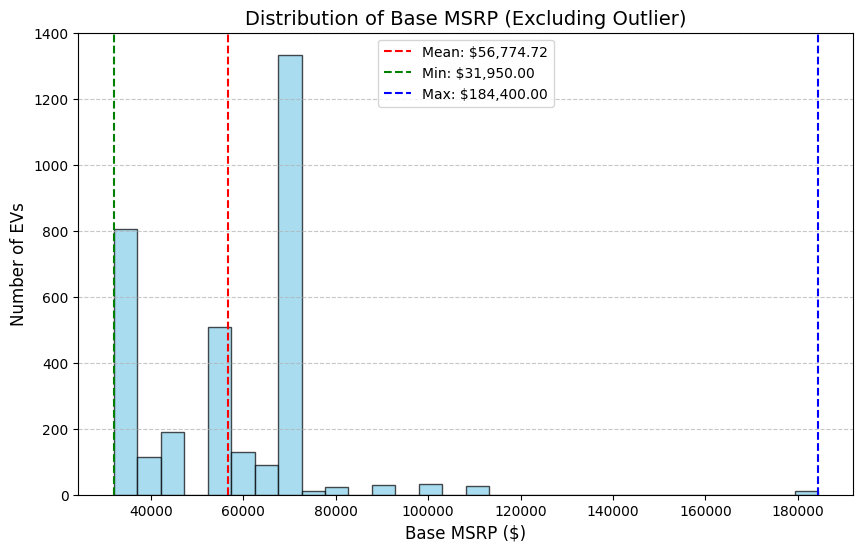

In [178]:
# Plot a histogram for Base MSRP (filtered to exclude zeros and the Porsche outlier)
plt.figure(figsize=(10, 6))
plt.hist(filtered_msrp_no_outlier['Base MSRP'], bins=30, color='skyblue', edgecolor='black', alpha=0.7) 
plt.title('Distribution of Base MSRP (Excluding Outlier)', fontsize=14) 
plt.xlabel('Base MSRP ($)', fontsize=12)
plt.ylabel('Number of EVs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add vertical lines for mean, min, and max
mean_msrp = filtered_msrp_no_outlier['Base MSRP'].mean()
min_msrp = filtered_msrp_no_outlier['Base MSRP'].min()
max_msrp = filtered_msrp_no_outlier['Base MSRP'].max()

plt.axvline(mean_msrp, color='red', linestyle='--', linewidth=1.5, label=f'Mean: ${mean_msrp:,.2f}') 
plt.axvline(min_msrp, color='green', linestyle='--', linewidth=1.5, label=f'Min: ${min_msrp:,.2f}') 
plt.axvline(max_msrp, color='blue', linestyle='--', linewidth=1.5, label=f'Max: ${max_msrp:,.2f}') 

# Add legend
plt.legend(fontsize=10)

# Display histogram
plt.show() 

**QUESTION 14**: What is the range of base MSRP for electric vehicles in the dataset, and what is the average MSRP?

Earlier, Question 7 revealed the importance of excluding zero values from an analysis of MSRP.  It also uncovered one MSRP outlier, a Porsche EV with a sticker price of `$845,000`.  In this question, I ran two sets of analyses: one including the outlier and the other excluding it.  I excluded zero values for both sets of analyses.  

**When including the outlier, MSRP ranges from `$31,950` to `$845,000`, encompassing a range of `$813,050`.**  I used `.min()` and `.max()` on `filtered_msrp` (excluding zeros) to find the minimum and maximum MSRP.  To find the range, I subtracted `msrp_min` from `msrp_max`.

**When excluding the outlier, MSRP ranges from `$31,950` to `$184,400`, encompassing a range of `$152,450`.**  I used `filtered_msrp_no_outlier = filtered_msrp[filtered_msrp['Base MSRP'] < 200000]` to exclude the Porsche from this analysis.  I then ran `.min()` and `.max()` and subtracted them to find the range as above.

**The average MSRP is `$57,012.93` with the outlier included and `$56,774.72` with the outlier excluded.** I used `.mean()` to find both of these values, running it first on `filtered_msrp` and then on `filtered_msrp_no_outlier`.  While the outlier has some effect on the mean, it more significantly impacts the MSRP range.  

**The visualization above shows this data as a histogram.**  The histogram shows the distribution of MSRP values and how many EVs fall into each bin.  It shows vertical markers for min, max, and mean, along with a legend and the respective values for each.


